In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import loompy
import cytograph as cg
%config InlineBackend.figure_format = 'retina'

In [10]:
def violin(gene):
    celltypes = [
        "VECV",
        "VECC",
        "PER2",
        "PER1",
        "VSMCA",
        "PER3",
        "VECA",
        "VLMC1",
        "VLMC2",
        "ABC",
        "ENVLMC",
        "ENTG7",
        "ENTG6",
        "ENTG5",
        "ENTG4",
        "ENTG3",
        "ENTG2",
        "ENTG1",
        "SATG1",
        "SATG2",
        "SCHW",
        "OPC",
        "OEC",
    ]
    colors = [
        "#D3A7A8",
        "#D3A7A8",
        "#252513",
        "#252513",
        "#D35085",
        "#D35085",
        "#D35085",
        "#0AA761",
        "#0AA761",
        "#0AA761",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#A4BEE3",
        "#A4BEE3",
        "#A20088",
        "#F7941D",
        "#009444"
    ]
    with loompy.connect("/Users/sten/build_20171205/L5_All.loom") as ds:
        #print(np.unique(ds.ca.ClusterName))
        d = []
        data = np.log2(ds[ds.ra.Gene == gene, :] + 1)
        for celltype in celltypes:
            print(celltype, (ds.ca.ClusterName == celltype).sum())
            if (ds.ca.ClusterName == celltype).sum() == 0:
                raise ValueError(celltype + " not found!")
            vals = data[:, ds.ca.ClusterName == celltype][0] 
            nnz = vals > 0
            vals[nnz] = vals[nnz] + np.random.uniform(size=nnz.sum())
            d.append(vals)
        plt.figure(figsize=(len(celltypes),1))
        ax = plt.subplot(111)
        ax.set_axis_off()
        violin_parts = plt.violinplot(d, showmeans=False, showmedians=False, showextrema=False)
        for ix, pc in enumerate(violin_parts['bodies']):
            pc.set_alpha(1)
            pc.set_facecolor(colors[ix])
            pc.set_linewidth(0.5)
            pc.set_edgecolor('black')
        #plt.text(x=0, y=1, s=gene, color='black', fontsize=10, alpha=0.7, horizontalalignment='right')
        #for ix, celltype in enumerate(celltypes):
        #    plt.text(x=ix+1, y=-1, s=celltype, color='black', fontsize=8, alpha=0.7, rotation=45, horizontalalignment='right')
        plt.savefig("/Users/sten/Dropbox (Linnarsson Group)/linnarsson group/Manuscripts/Whole brain/Figures/Figure_parts/neural_Crest_Like_and_vascular_Figure/" + gene + "_burst.png", dpi=600, transparent=True, bbox_inches='tight')
        plt.close()

In [11]:
violin("Sox10")

VECV 2780
VECC 1025
PER2 488
PER1 4725
VSMCA 1221
PER3 298
VECA 109
VLMC1 702
VLMC2 662
ABC 137
ENVLMC 49
ENTG7 1041
ENTG6 811
ENTG5 1132
ENTG4 4044
ENTG3 1135
ENTG2 2160
ENTG1 163
SATG1 30
SATG2 654
SCHW 47
OPC 820
OEC 2031


In [9]:
genes = [
    "Sox10", "Foxd3", "Aldh1a3", "Anxa11", "Slc18a2", "Klhl30", "Gfra3", "Dcn", "Lum",
    "Pdgfra", "Cldn19", "Gldn", "Dhrs2", "Ceacam10", "Cspg4", "Cspg5", "Olig1", "Pcdh15", "Aldoc",
    "Npy", "Vtn"
]
for gene in genes:
    violin(gene)

In [37]:
with loompy.connect("/Users/sten/build_20171205/L5_All.agg.loom") as ds:
    for g in ds.ra.Gene:
        if g.startswith("Un"):
            print(g)


Unc5b
Uncx
Unc5c
Unc13c
Unc5a
Unc5d
Unc13b
Unc119
Unc5cl
Unc45b
Unc93a
Unc93b1
Ung
Unk
Unc13d
Unc80
Unc45a
Unc119b
Unc13a
Unc50
Unc79
Unkl


In [38]:
def burst(celltypes, genes, colors, fname):
    with loompy.connect("/Users/sten/build_20171205/L5_All.agg.loom") as dsagg:
        cols = dsagg.ca.ClusterName
        trinaries = dsagg["trinaries"][:,:]
    with loompy.connect("/Users/sten/build_20171205/L5_All.loom") as ds:
        plt.figure(figsize=(len(celltypes)/2,len(genes)/2))
        for ix,gene in enumerate(genes):
            print(gene)
            ax = plt.subplot(len(genes), 1, len(genes) - ix)
            ax.set_axis_off()
            d = []
            data = np.log2(ds[ds.ra.Gene == gene, :] + 1)
            for ix, celltype in enumerate(celltypes):
                if (ds.ca.ClusterName == celltype).sum() == 0:
                    raise ValueError(celltype + " not found!")
                vals = data[:, ds.ca.ClusterName == celltype][0]
                if vals.shape[0] > 100:
                    vals = np.random.choice(vals, size=100, replace=False)
                nnz = vals > 0
                vals[nnz] = vals[nnz] + np.random.uniform(size=nnz.sum())
                vals[~nnz] = vals[~nnz] + np.random.uniform(size=(~nnz).sum()) * 0.5
                color = colors[ix]
                if trinaries[ds.ra.Gene == gene, :][:, cols == celltype] < 0.5:
                    color = "#DDDDDD"
                plt.scatter(x=np.random.uniform(low=-0.5,high=0.25,size=vals.shape[0]) + ix, y=vals, c=color, marker='.', s=10, alpha=1)
                #plt.text(x=ix, y=-2, s=celltype, color='black', fontsize=15, alpha=0.7, rotation=45, horizontalalignment='right')
            #plt.text(x=-1, y=0, s=gene, color='black', fontsize=15, alpha=0.7, horizontalalignment='right')
        plt.savefig(fname, dpi=600, transparent=True, bbox_inches='tight', pad_inches=0)
        plt.close()

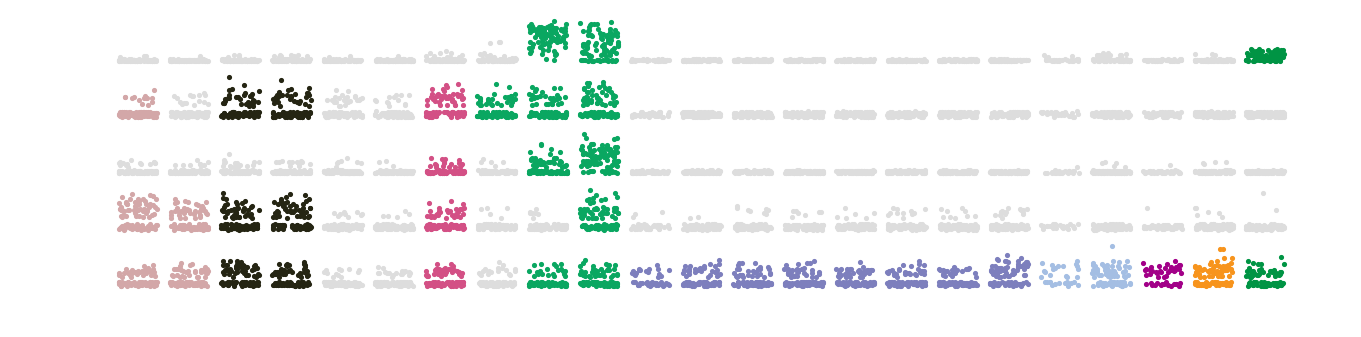

In [10]:
genes = [
    "Pgp", "Abcg2", "Cldn11", "Foxc1", "Ptgds"
]
burst(genes)

In [22]:
celltypes = [
        "VECV",
        "VECC",
        "PER2",
        "PER1",
        "VSMCA",
        "PER3",
        "VECA",
        "VLMC1",
        "VLMC2",
        "ABC",
        "ENVLMC",
        "ENTG7",
        "ENTG6",
        "ENTG5",
        "ENTG4",
        "ENTG3",
        "ENTG2",
        "ENTG1",
        "SATG1",
        "SATG2",
        "SCHW",
        "OPC",
        "OEC",
    ]
genes = [
    "Cldn5", "Adgrf5", "Emcn", "Vtn", "Cspg4", "Atp13a5", "Pth1r", "Kcnj8", "Abcc9", "Apln", "Cd82", "Chst1",
    "Tagln", "Pln", "Bmx", "Gkn3", "Igfbp2", "Dcn", "Lum",
    "Pdgfra",  "Il33", "Ptgds", "Nnat", "Rspo3", "Nov", "Slc47a1",
    "Sox10", "Foxd3", "Aldh1a3", "Anxa11", "Slc18a2", "Klhl30", "Gfra3", "Cldn19", "Mpz", "Dhrs2", "Ceacam10", "Cspg5", "Olig1", "Pcdh15", "Aldoc",
    "Npy", "Apod"
]
    colors = [
        "#D3A7A8",
        "#D3A7A8",
        "#252513",
        "#252513",
        "#D35085",
        "#D35085",
        "#D35085",
        "#0AA761",
        "#0AA761",
        "#0AA761",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#A4BEE3",
        "#A4BEE3",
        "#A20088",
        "#F7941D",
        "#009444",

    ]
burst(celltypes, genes, colors, "/Users/sten/Dropbox (Linnarsson Group)/linnarsson group/Manuscripts/Whole brain/Figures/Figure_parts/neural_Crest_Like_and_vascular_Figure/Neural_crest_like.png")

In [43]:
celltypes = [
    "PSNP6",
    "PSNP5",
    "PSNP4",
    "PSNP3",
    "PSNP2",
    "PSNP1",
    "PSNF1",
    "PSNF2",
    "PSNF3",
    "PSPEP1",
    "PSPEP3",
    "PSPEP4",
    "PSPEP2",
    "PSPEP5",
    "PSPEP6",
    "PSPEP7",
    "PSPEP8",
    "SYCHO1",
    "SYCHO2",
    "SYNOR5",
    "SYNOR4",
    "SYNOR3",
    "SYNOR2",
    "SYNOR1",
    "ENT9",
    "ENT8",
    "ENT7",
    "ENT6",
    "ENT5",
    "ENT4",
    "ENT3",
    "ENT2",
    "ENT1"
    ]

genes = [
    "Etv1",
    "Gal",
    "Cartpt",
    "Nos1",
    "Cox8b",
    "Col12a1",
    "Ly6e",
    "Tac1",
    "Trps1",
    "Scgn",
    "Ucn3",
    "Nmu",
    "Nog",
    "Htr3a",
    "Brinp1",
    "Ccne1",
    "Hcrtr1",
    "Cyp2j12",
    "Pthlh",
    "Ltk",
    "Ctla2a",
    "Vip",
    "Slc18a3",
    "Gda",
    "Cgnl1",
    "Sertm1",
    "Itk",
    "Dcdc2a",
    "Prrx2",
    "Angpt4",
    "Pcdh19",
    "Ntm",
    "Cadps2",
    "Pvalb",
    "Gprc5b",
    "Ptgfr",
    "Cd34",
    "Pkib",
    "Lpar3",
    "Otoa",
    "Car8",
    "Nppb"
]
colors = [
        "#D35085",
        "#D35085",
        "#D35085",
        "#D35085",
        "#D35085",
        "#D35085",
        
        "#D3A7A8",
        "#D3A7A8",
        "#D3A7A8",

        "#F35085",
        "#F35085",
        "#F35085",
        "#F35085",
        "#F35085",
        "#F35085",
        "#F35085",
        "#F35085",

        "#F7941D",
        "#F7941D",
        "#0AA761",
        "#0AA761",
        "#0AA761",
        "#0AA761",
        "#0AA761",

        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD"
]
burst(celltypes, genes, colors, "/Users/sten/Dropbox (Linnarsson Group)/linnarsson group/Manuscripts/Whole brain/Figures/Figure_parts/neural_Crest_Like_and_vascular_Figure/Peripheral_neurons.png")

Etv1
Gal
Cartpt
Nos1
Cox8b
Col12a1
Ly6e
Tac1
Trps1
Scgn
Ucn3
Nmu
Nog
Htr3a
Brinp1
Ccne1
Hcrtr1
Cyp2j12
Pthlh
Ltk
Ctla2a
Vip
Slc18a3
Gda
Cgnl1
Sertm1
Itk
Dcdc2a
Prrx2
Angpt4
Pcdh19
Ntm
Cadps2
Pvalb
Gprc5b
Ptgfr
Cd34
Pkib
Lpar3
Otoa
Car8
Nppb


In [40]:
for c in celltypes:
    print(c)

PSNP6
PSNP5
PSNP4
PSNP3
PSNP2
PSNP1
PSNF1
PSNF2
PSNF3
PSPEP1
PSPEP3
PSPEP4
PSPEP2
PSPEP5
PSPEP6
PSPEP7
PSPEP8
SYCHO1
SYCHO2
SYNOR5
SYNOR4
SYNOR3
SYNOR2
SYNOR1
ENT9
ENT8
ENT7
ENT6
ENT5
ENT4
ENT3
ENT2
ENT1
